### GRATED RECURREND UNIT ARCHITECTURE 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv('SYMPTOMS.csv', usecols=['label','text'])
Data.head()

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [3]:
Data.tail()

,label,text
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."
1199,diabetes,I constantly sneeze and have a dry cough. My i...


In [4]:
Data['label'].value_counts()

label
Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: count, dtype: int64

In [5]:
Data['text'] = Data['text'].apply(lambda x: x.lower() if pd.notna(x) else "")

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data['label'] = label_encoder.fit_transform(Data['label'])

In [7]:
num_classes = len(label_encoder.classes_) 

In [8]:
x = Data['text']
y = Data['label']

In [9]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=num_classes)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
max_words = 10000  
max_sequence_length = 100

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [13]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length)

In [15]:
embedding_dim = 100  
RNN_units = 128

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(units=RNN_units, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(units=num_classes, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('DISEASE1.h5', 
                                   monitor='accuracy', 
                                   save_best_only=True, 
                                   verbose=1,
                                   mode='max')

In [20]:
epochs = 10
batch_size = 32

In [21]:
model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[model_checkpoint])

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 3.1678 - accuracy: 0.0845
Epoch 1: accuracy improved from -inf to 0.08449, saving model to DISEASE1.h5
27/27 [==============================] - 9s 220ms/step - loss: 3.1678 - accuracy: 0.0845 - val_loss: 3.1473 - val_accuracy: 0.2396
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 3.0033 - accuracy: 0.3229
Epoch 2: accuracy improved from 0.08449 to 0.32292, saving model to DISEASE1.h5
27/27 [==============================] - 5s 174ms/step - loss: 3.0033 - accuracy: 0.3229 - val_loss: 2.8201 - val_accuracy: 0.2083
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 2.4835 - accuracy: 0.3681
Epoch 3: accuracy improved from 0.32292 to 0.36806, saving model to DISEASE1.h5
27/27 [==============================] - 5s 175ms/step - loss: 2.4835 - accuracy: 0.3681 - val_loss: 2.3074 - val_accuracy: 0.3229
Epoch 4/10
27/27 [==============================] - ETA: 0s - loss: 1.8914 - accuracy: 0

In [22]:
y_pred = model.predict(x_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

8/8 [==============================] - 1s 19ms/step


In [23]:
from sklearn.metrics import accuracy_score

AC = accuracy_score(y_pred_classes,y_true_classes)

print("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS :",AC*100)

THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS : 78.33333333333333


In [24]:
from sklearn.metrics import hamming_loss

HL = hamming_loss(y_pred_classes,y_true_classes)

print("THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS :",HL*100)

THE HAMMING LOSS OF GRATED RECURREND UNIT ARCHITECTURE IS : 21.666666666666668


In [25]:
from sklearn.metrics import classification_report

CR = classification_report(y_pred_classes,y_true_classes)

print('THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CR)

THE PRECISION SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      0.79      0.88        14
           3       0.86      1.00      0.92         6
           4       0.33      0.36      0.35        11
           5       0.58      1.00      0.74         7
           6       0.25      0.50      0.33         6
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00        13
           9       0.90      0.75      0.82        12
          10       0.73      0.50      0.59        16
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        11
          13       0.80      0.89      0.84         9
          14       0.91      1.00      0.95        10
          15       0.83      0.56      0.67         9
          16       

In [26]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_pred_classes,y_true_classes)

print('THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:\n\n\n',CM)

THE CONFUSION MATRIX SCORE OF GRATED RECURREND UNIT ARCHITECTURE:


 [[ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  6  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  3  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  1  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  3  2  1  0  0  0  8  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

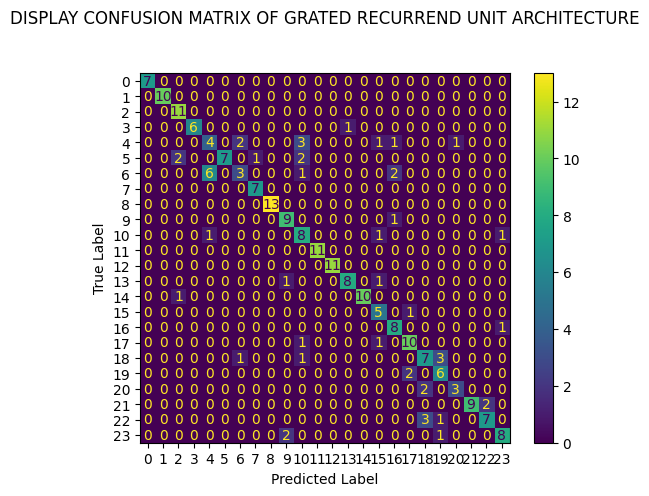

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_classes, y_pred_classes)

classes = np.arange(cm.shape[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')

plt.title('DISPLAY CONFUSION MATRIX OF GRATED RECURREND UNIT ARCHITECTURE\n\n')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


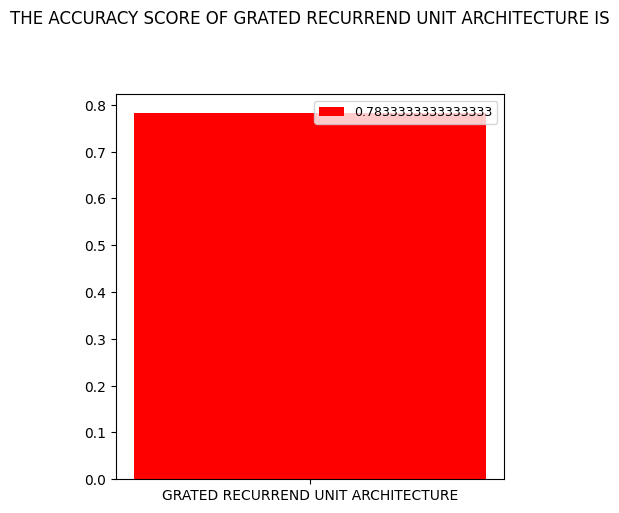

In [28]:
def graph():
    import matplotlib.pyplot as plt
    data=[AC]
    alg="GRATED RECURREND UNIT ARCHITECTURE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("RED"))
    plt.title("THE ACCURACY SCORE OF GRATED RECURREND UNIT ARCHITECTURE IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()